In [1]:
import numpy as np
import pandas as pd
import pandasql as sql
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
categorical_data = [feature for feature in df.columns if df[feature].dtypes=='object']
categorical_data

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [6]:
for feature in categorical_data:
    print(feature,df[feature].unique(), '\n',len(df[feature].unique()),len(df[feature].unique())/len(df[feature]),'\n', 'nan values :' ,df[feature].isnull().mean(),'\n\n')

Date ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31'] 
 3436 0.023621614189467895 
 nan values : 0.0 


Location ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru'] 
 49 0.00033686236766121273 
 nan values : 0.0 


WindGustDir ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW'] 
 17 0.0001168706173518493 
 nan values : 0.0709885879279527 


WindDir9am ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 

In [7]:
for feature in categorical_data:
    n = 0
    d=False
    
    if d == False:
        if len(df[feature].unique()) < 4:
            print(feature, df[feature].unique())
            d = True
    
    for row in df[feature].unique():
        
        if type(row) != float:
            for char in str(row):


                if n>5:
                    break


                elif char in [ii for ii in '1234567890']:
                    print(feature,row)

                    n+=1
            
            

Date 2008-12-01
Date 2008-12-01
Date 2008-12-01
Date 2008-12-01
Date 2008-12-01
Date 2008-12-01
RainToday ['No' 'Yes' nan]
RainTomorrow ['No' 'Yes' nan]


as there is no categorical data that is continuous so we have to get rid of the null values, as we cannot take AVARAGE of an categorical data

In [8]:
df.dropna(subset=categorical_data, inplace=True)

In [9]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [10]:
df['Date'] = df['Date'].astype('datetime64')

In [11]:
encoder = LabelEncoder()

In [12]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
# ['RainToday','RainTomorrow']

df['RainToday'] = encoder.fit_transform(df['RainToday'])
df['RainTomorrow'] = encoder.fit_transform(df['RainTomorrow'])

In [14]:
df[['RainToday','RainTomorrow']].astype('float64')

,RainToday,RainTomorrow
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
145454,0.0,0.0
145455,0.0,0.0
145456,0.0,0.0
145457,0.0,0.0


In [15]:
df['RainToday'].unique()

array([0, 1])

In [16]:
categorical_data = [feature for feature in df.columns if df[feature].dtype == 'object']

In [17]:
numerical_data = [feature for feature in df.columns if df[feature].dtype != 'object']

In [18]:
numerical_data

['Date',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [19]:
len(df.columns) == ( len(categorical_data) + len(numerical_data) )

True

temporal data vs continuous data vs discrete data

In [20]:
temporal_data = ['Date']

In [21]:
discrete_data = [feature for feature in df.columns if len(df[feature].unique()) < 25 and feature not in categorical_data + temporal_data]
discrete_data

['Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow']

In [22]:
continuous_data = [feature for feature in df.columns if len(df[feature].unique()) > 25 and feature not in categorical_data + temporal_data+ discrete_data]
continuous_data

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [23]:
for feature in discrete_data:
    print(feature, df[feature].isnull().mean())

Cloud9am 0.373728882062889
Cloud3pm 0.3898876404494382
RainToday 0.0
RainTomorrow 0.0


In [24]:
for feature in continuous_data:
    print(feature, df[feature].isnull().mean())

MinTemp 0.0007275078813353812
MaxTemp 0.0003637539406676906
Rainfall 0.0
Evaporation 0.4094010185110339
Sunshine 0.4577075418317032
WindGustSpeed 0.0
WindSpeed9am 0.0
WindSpeed3pm 0.0
Humidity9am 0.008180421954571174
Humidity3pm 0.012302966615471667
Pressure9am 0.07372079864198529
Pressure3pm 0.07330854417589523
Temp9am 0.0027726133699781746
Temp3pm 0.006426319618462534


In [25]:
for feature in continuous_data:
    df[feature].fillna(df[feature].median(),inplace=True)

In [26]:
df.dropna(inplace=True)

In [27]:
len(df)

72051

## exploratory data analysis

In [28]:
correlation = df.corr(method='spearman')

In [29]:
correlation['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.459125
Cloud3pm         0.403721
Rainfall         0.344072
Cloud9am         0.341897
RainToday        0.316897
Humidity9am      0.301315
WindGustSpeed    0.215090
WindSpeed3pm     0.080533
WindSpeed9am     0.078362
MinTemp          0.067171
Temp9am         -0.038479
Evaporation     -0.128282
MaxTemp         -0.162519
Temp3pm         -0.197185
Pressure3pm     -0.220963
Pressure9am     -0.242276
Sunshine        -0.388802
Name: RainTomorrow, dtype: float64

In [30]:
correlation['RainToday'].sort_values(ascending=False)

RainToday        1.000000
Rainfall         0.854139
Humidity9am      0.419772
Humidity3pm      0.401422
Cloud9am         0.323944
RainTomorrow     0.316897
Cloud3pm         0.283394
WindGustSpeed    0.144881
WindSpeed3pm     0.090079
WindSpeed9am     0.087611
MinTemp          0.030861
Pressure3pm     -0.099381
Temp9am         -0.117729
Pressure9am     -0.180583
Evaporation     -0.225152
MaxTemp         -0.233966
Temp3pm         -0.240047
Sunshine        -0.299425
Name: RainToday, dtype: float64

In [31]:
def correlation_dict(df,threshold=0.65,type_corr = 'pearson'):
    '''
    df: dataset
    threshold: float
    type_corr: str
    
    Parameters
    __________
    method : {'pearson', 'kendall', 'spearman'} or callable
    Method of correlation:

    * pearson : standard correlation coefficient
    * kendall : Kendall Tau correlation coefficient
    * spearman : Spearman rank correlation
    * callable: callable with input two 1d ndarrays
        and returning a float. Note that the returned matrix from corr
        will have 1 along the diagonals and will be symmetric
        regardless of the callable's behavior.
    '''
    
    correlated_features = df.corr(method = type_corr)
    correlated = {}
    
    for feature in correlated_features.columns:
        values = []
        n=0
        
        for row in correlated_features[feature]:
            if (row > 0.65 or row < -0.65) and correlated_features.index[n] != feature:
                values.append(correlated_features.index[n])
            n+=1
        
        if len(values) >0:
            correlated[feature] = values
        
    return correlated
    

In [32]:
correlated = correlation_dict(df)
correlated

{'MinTemp': ['MaxTemp', 'Temp9am', 'Temp3pm'],
 'MaxTemp': ['MinTemp', 'Temp9am', 'Temp3pm'],
 'WindGustSpeed': ['WindSpeed3pm'],
 'WindSpeed3pm': ['WindGustSpeed'],
 'Humidity9am': ['Humidity3pm'],
 'Humidity3pm': ['Humidity9am'],
 'Pressure9am': ['Pressure3pm'],
 'Pressure3pm': ['Pressure9am'],
 'Temp9am': ['MinTemp', 'MaxTemp', 'Temp3pm'],
 'Temp3pm': ['MinTemp', 'MaxTemp', 'Temp9am']}

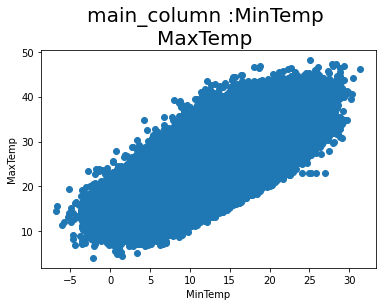

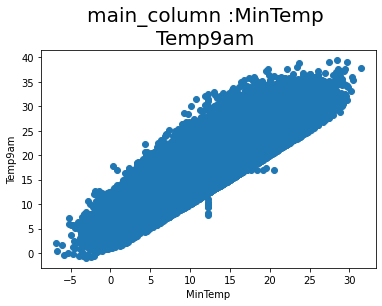

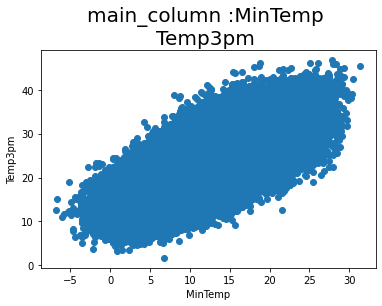

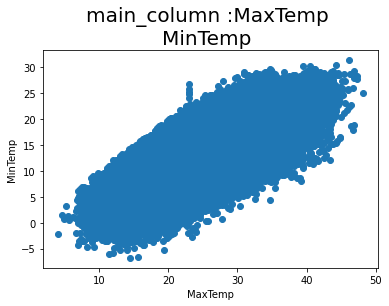

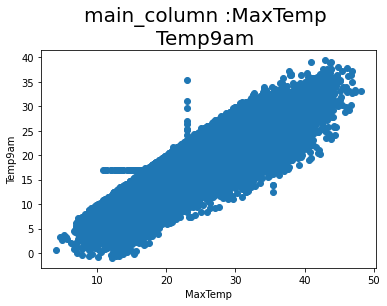

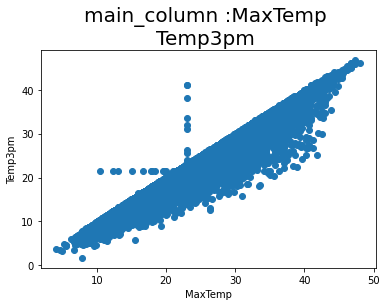

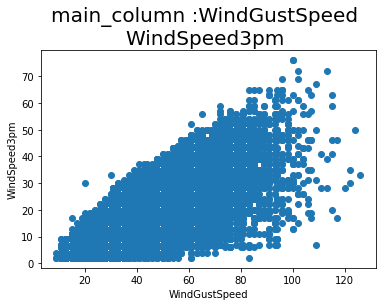

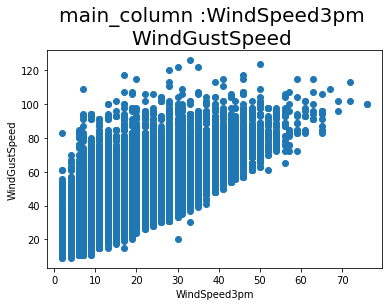

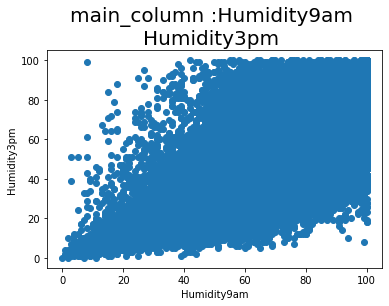

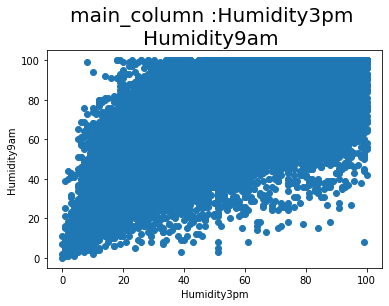

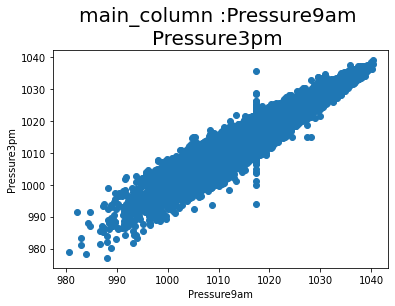

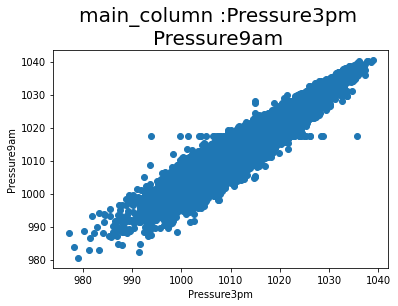

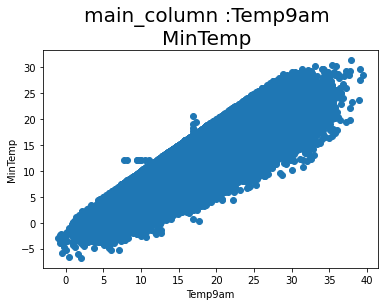

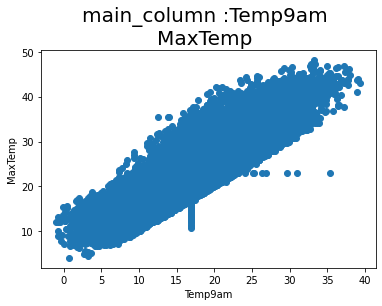

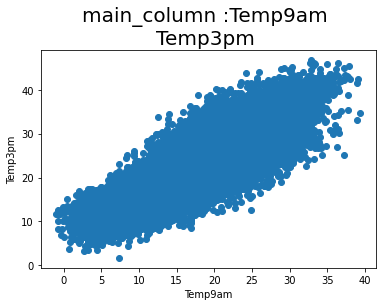

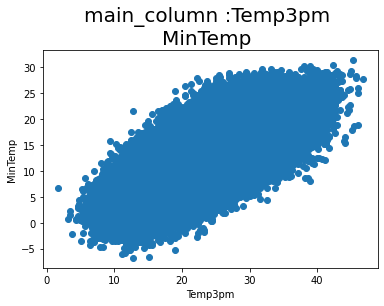

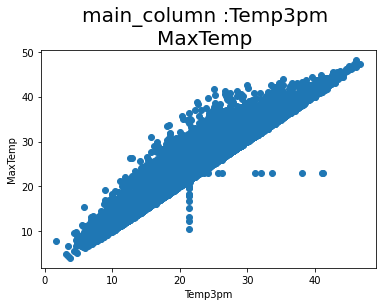

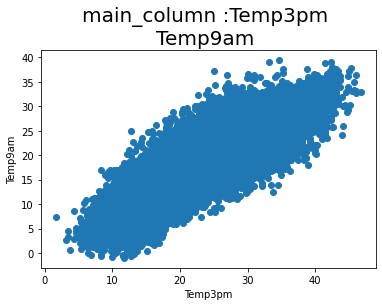

In [33]:
for columns in correlated:
    
    for feature in correlated[columns]:
        fig,ax = plt.subplots()
        ax.scatter(df[columns],df[feature])
        ax.set_title(f"main_column :{columns} \n{feature} ",fontdict={'fontsize':20})
        ax.set_xlabel(columns)
        ax.set_ylabel(feature)
        ax.plot()
        


In [34]:
correlated = correlation_dict(df,type_corr='spearman')

In [35]:
correlated

{'MinTemp': ['MaxTemp', 'Temp9am', 'Temp3pm'],
 'MaxTemp': ['MinTemp', 'Temp9am', 'Temp3pm'],
 'Rainfall': ['RainToday'],
 'WindGustSpeed': ['WindSpeed3pm'],
 'WindSpeed3pm': ['WindGustSpeed'],
 'Humidity9am': ['Humidity3pm'],
 'Humidity3pm': ['Humidity9am'],
 'Pressure9am': ['Pressure3pm'],
 'Pressure3pm': ['Pressure9am'],
 'Temp9am': ['MinTemp', 'MaxTemp', 'Temp3pm'],
 'Temp3pm': ['MinTemp', 'MaxTemp', 'Temp9am'],
 'RainToday': ['Rainfall']}

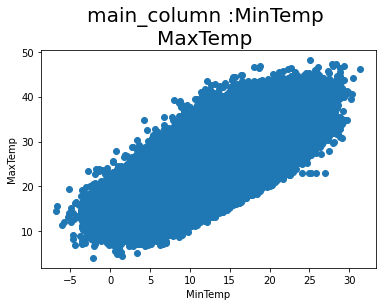

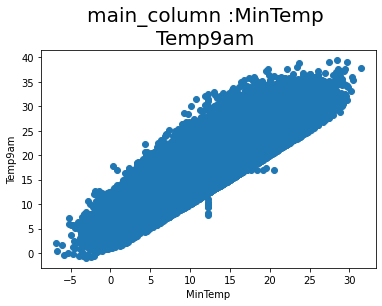

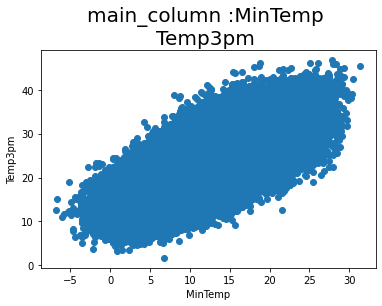

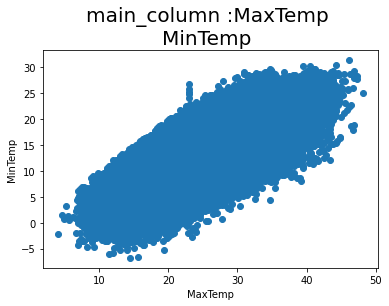

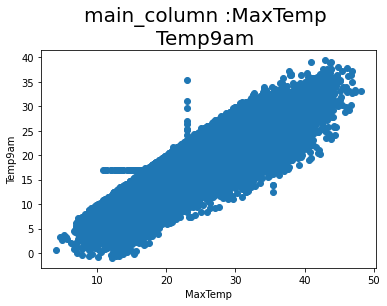

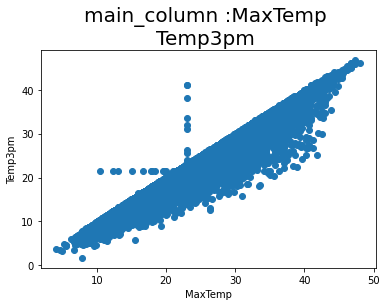

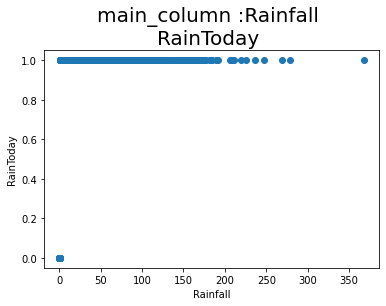

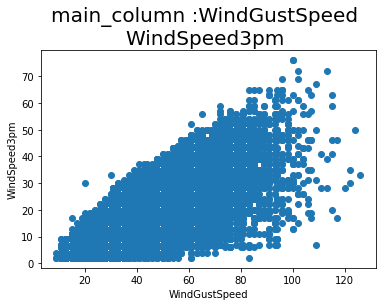

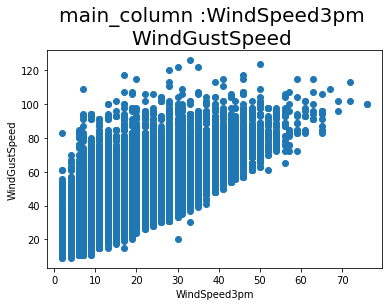

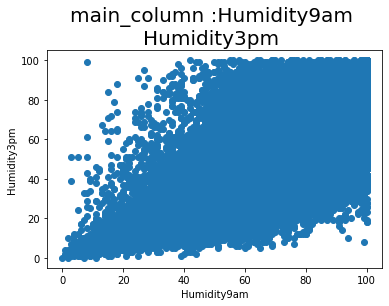

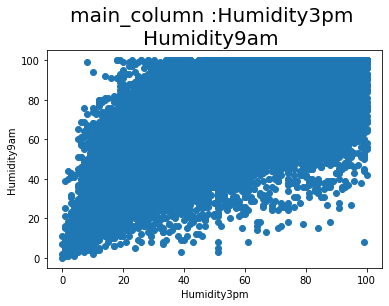

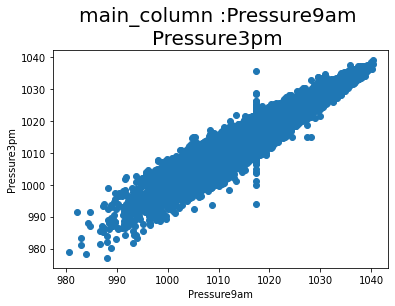

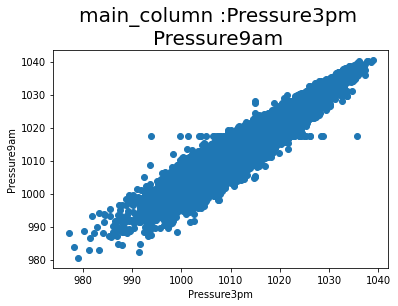

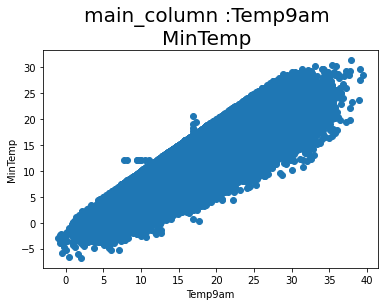

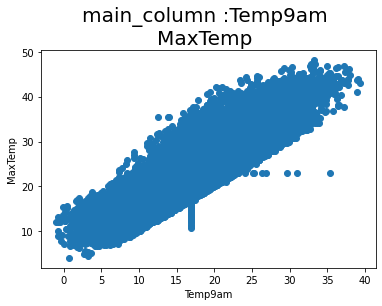

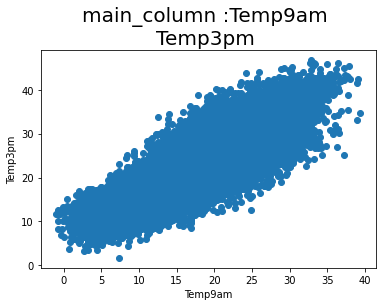

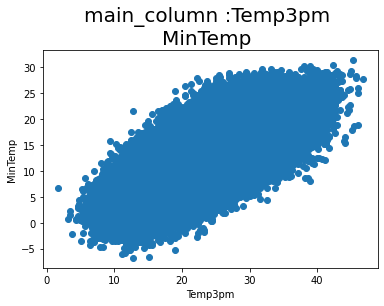

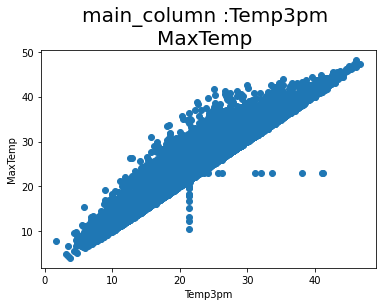

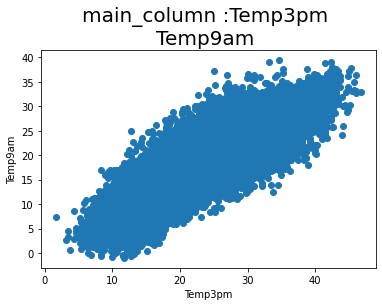

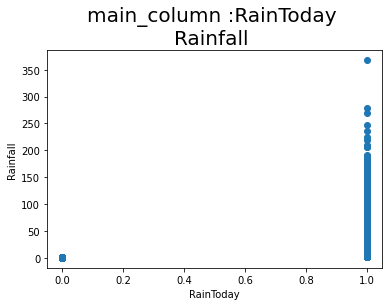

In [36]:
for columns in correlated:
    
    for feature in correlated[columns]:
        fig,ax = plt.subplots()
        ax.scatter(df[columns],df[feature])
        ax.set_title(f"main_column :{columns} \n{feature} ",fontdict={'fontsize':20})
        ax.set_xlabel(columns)
        ax.set_ylabel(feature)
        ax.plot()

In [37]:
correlation_dict(df,threshold=0.90)

{'MinTemp': ['MaxTemp', 'Temp9am', 'Temp3pm'],
 'MaxTemp': ['MinTemp', 'Temp9am', 'Temp3pm'],
 'WindGustSpeed': ['WindSpeed3pm'],
 'WindSpeed3pm': ['WindGustSpeed'],
 'Humidity9am': ['Humidity3pm'],
 'Humidity3pm': ['Humidity9am'],
 'Pressure9am': ['Pressure3pm'],
 'Pressure3pm': ['Pressure9am'],
 'Temp9am': ['MinTemp', 'MaxTemp', 'Temp3pm'],
 'Temp3pm': ['MinTemp', 'MaxTemp', 'Temp9am']}

## using sklearn

In [38]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
encoder = LabelEncoder()

In [40]:
for i in categorical_data:
    df[i]=encoder.fit_transform(df[i])

In [41]:
from datetime import date

def datespan(data,date_min = True, default_date='1950-01-01'):
    
    if date_min == True:
        default_date = data.min()
                
    
    if type(data) == str:
        if len(data) == 10 and len(default_date) == 10:
            year1=int(data[:4])
            month1=int(data[5:7])
            day1=int(data[8:])
            
            year2=int(default_date[:4])
            month2=int(default_date[5:7])
            day2=int(default_date[8:])
            
            start=date(year2,month2,day2)
            end=date(year1,month1,day1)

            return (end-start).days
        else:
            pass
            
    elif data.dtype == '<M8[ns]':
        data = np.datetime_as_string(data,unit='D')
        return_date = []
        oldest_date=0
        for i in data:
            year=int(i[:4])
            month=int(i[5:7])
            day=int(i[8:])
            
            i=date(year,month,day)
            if oldest_date == 0:
                oldest_date=i
            else:
                if oldest_date > i:
                    oldest_date=i
        
        for i in data:
            if len(i) == 10:
                year=int(i[:4])
                month=int(i[5:7])
                day=int(i[8:])

                

                end=date(year,month,day)

                return_date.append((end-oldest_date).days)
            
            else:
                pass
        
        return return_date

In [42]:
df['Date'] = datespan(df['Date'])

In [43]:
scaler = StandardScaler()

In [44]:
x = df[[i for i in df.columns if i not in ['RainTomorrow']]]
y = df['RainTomorrow']

In [45]:
# x=scaler.fit_transform(x)
# y=scaler.fit_transform(np.array(y).reshape(-1,1))

In [46]:
# x.shape, y.shape

In [47]:
X_train,X_test,y_train,y_test =train_test_split(x,y,test_size=0.8)

In [48]:
models = [KNeighborsClassifier(),svm.SVC(),DecisionTreeClassifier(),
          RandomForestClassifier(),GradientBoostingClassifier()]

In [55]:
for model in models:
    print(model.fit(X_train,y_train),'\n')
    print(model.score(X_test,y_test),'\n\n')
    

KNeighborsClassifier() 

0.8239274127790982 


SVC() 

0.762825072431082 


DecisionTreeClassifier() 

0.783400704359744 


RandomForestClassifier() 

0.8480595409517531 


GradientBoostingClassifier() 

0.8479554483787581 




## Gradient Boosting Classifier works much better